<a href="https://colab.research.google.com/github/bieri2/ATMS597-Project3-GroupE/blob/master/ltm_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy
!pip install netcdf4

Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 2.8MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    U

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import xarray as xr

In [28]:
## Importing Long-term Mean NCEP Reanalysis data from 1981-2010, only selecting DJF

months = xr.cftime_range(start='0001-01-01', end='0001-12-01', freq='MS', calendar = 'standard') # selecting long-term mean data for 1981-2010 with cftime.DatetimeGregorian format
months = months[(months.month==12)|(months.month==1)|(months.month==2)] # selecting long-term mean data for DJF in 1981-2010

# Extract data
ds_Uwind_250hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=250, time = months)
ds_Vwind_250hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=250, time = months)
ds_GeopHgt_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Uwind_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Vwind_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Omega_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/omega.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Uwind_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_Vwind_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_SpecHum_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_AirTemp_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_Uwind_sig995_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)
ds_Vwind_sig995_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)
ds_SkinTemp_Sfc_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)
ds_PrecipWater_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

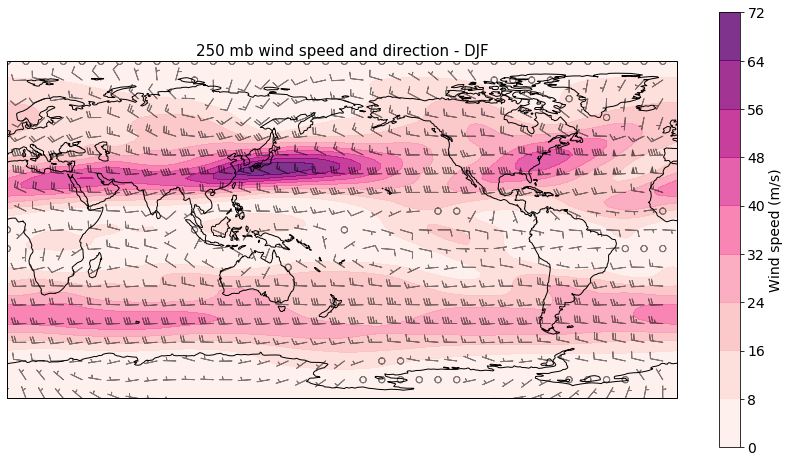

In [59]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
ax.coastlines()

uwind_djf_ltm_250 = ds_Uwind_250hPa_LTM.mean(dim='time')['uwnd']
vwind_djf_ltm_250 = ds_Vwind_250hPa_LTM.mean(dim='time')['vwnd']

wind_speed_250 = np.sqrt(uwind_djf_ltm_250**2 + vwind_djf_ltm_250**2)

c = ax.contourf(wind_speed_250.lon, wind_speed_250.lat,
            wind_speed_250,10,transform=ccrs.PlateCarree(), cmap='RdPu', alpha=0.8)

ax.barbs(uwind_djf_ltm_250.lon.values[::4], uwind_djf_ltm_250.lat.values[::4], 
         uwind_djf_ltm_250[::4,::4], vwind_djf_ltm_250[::4,::4], 
         length=5,sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),linewidth=0.95,alpha=0.5)

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label(label='Wind speed (m/s)',fontsize=14)
#ax.stock_img()

plt.title('250 mb wind speed and direction - DJF', fontsize=15)
plt.show()

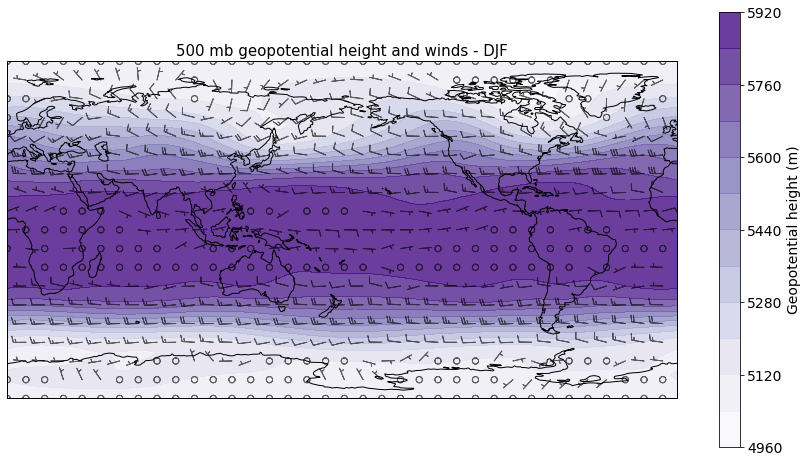

In [65]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
ax.coastlines()

uwind_djf_ltm_500 = ds_Uwind_500hPa_LTM.mean(dim = 'time')['uwnd']
vwind_djf_ltm_500 = ds_Vwind_500hPa_LTM.mean(dim = 'time')['vwnd']
gh_djf_ltm_500    = ds_GeopHgt_500hPa_LTM.mean(dim = 'time')['hgt']

c = ax.contourf(gh_djf_ltm_500.lon, gh_djf_ltm_500.lat,
            gh_djf_ltm_500,10,transform=ccrs.PlateCarree(), cmap='Purples', alpha=0.8)

ax.barbs(uwind_djf_ltm_500.lon.values[::4], uwind_djf_ltm_500.lat.values[::4], 
         uwind_djf_ltm_500[::4,::4], vwind_djf_ltm_500[::4,::4], 
         length=5,sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),linewidth=0.95,alpha=0.6)

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label(label='Geopotential height (m)',fontsize=14)
#ax.stock_img()

plt.title('500 mb geopotential height and winds - DJF', fontsize=15)
plt.show()

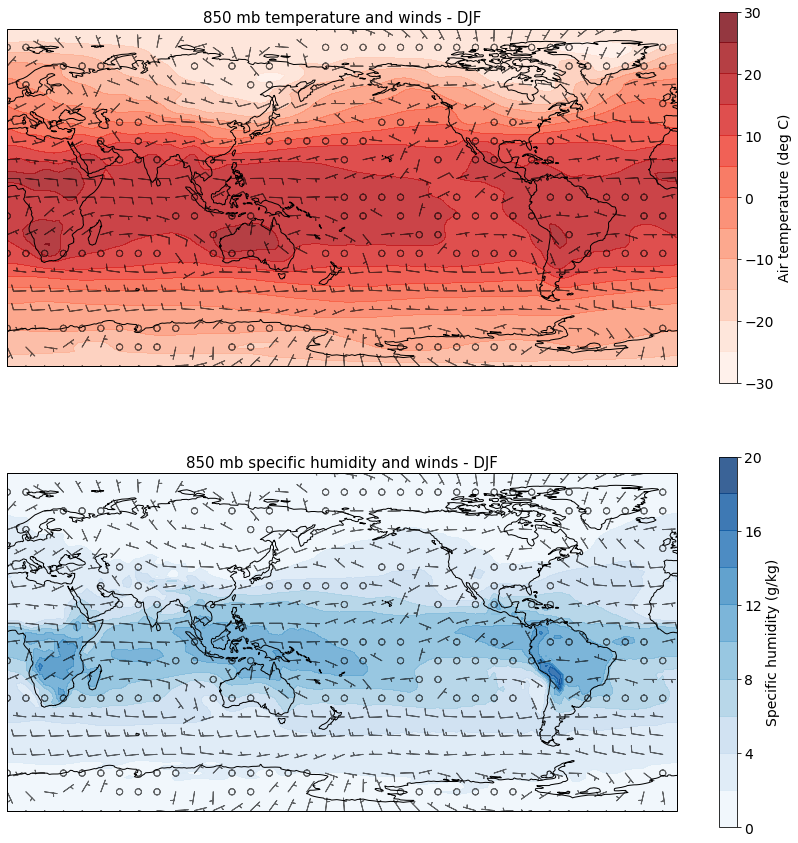

In [79]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
ax.coastlines()

uwind_djf_ltm_850 = ds_Uwind_850hPa_LTM.mean(dim = 'time')['uwnd']
vwind_djf_ltm_850 = ds_Vwind_850hPa_LTM.mean(dim = 'time')['vwnd']
t_djf_ltm_850     = ds_AirTemp_850hPa_LTM.mean(dim = 'time')['air']

c = ax.contourf(t_djf_ltm_850.lon, t_djf_ltm_850.lat,
            t_djf_ltm_850,10,transform=ccrs.PlateCarree(), cmap='Reds', alpha=0.8)

ax.barbs(uwind_djf_ltm_850.lon.values[::4], uwind_djf_ltm_850.lat.values[::4], 
         uwind_djf_ltm_850[::4,::4], vwind_djf_ltm_850[::4,::4], 
         length=5,sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),linewidth=0.95,alpha=0.6)

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label(label='Air temperature (deg C)',fontsize=14)
#ax.stock_img()

plt.title('850 mb temperature and winds - DJF', fontsize=15)
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))

sh_djf_ltm_850 = ds_SpecHum_850hPa_LTM.mean(dim = 'time')['shum']
ax2.coastlines()

c2 = ax2.contourf(sh_djf_ltm_850.lon, sh_djf_ltm_850.lat,
            sh_djf_ltm_850,10,transform=ccrs.PlateCarree(), cmap='Blues', alpha=0.8)

ax2.barbs(uwind_djf_ltm_850.lon.values[::4], uwind_djf_ltm_850.lat.values[::4], 
         uwind_djf_ltm_850[::4,::4], vwind_djf_ltm_850[::4,::4], 
         length=5,sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),linewidth=0.95,alpha=0.6)

cbar2 = fig.colorbar(c2)
cbar2.ax.tick_params(labelsize=14) 
cbar2.set_label(label='Specific humidity (g/kg)',fontsize=14)
#ax.stock_img()

ax2.set_title('850 mb specific humidity and winds - DJF', fontsize=15)

plt.show()

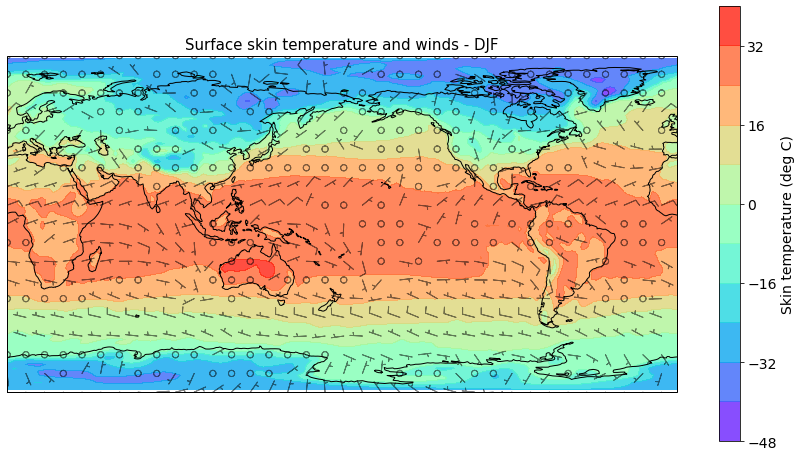

In [103]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
ax.coastlines()

uwind_djf_ltm_sfc = ds_Uwind_sig995_LTM.mean(dim='time')['uwnd']
vwind_djf_ltm_sfc = ds_Vwind_sig995_LTM.mean(dim='time')['vwnd']

t_sfc = ds_SkinTemp_Sfc_LTM.mean(dim = 'time')['skt']

c = ax.contourf(t_sfc.lon, t_sfc.lat,
            t_sfc,10,transform=ccrs.PlateCarree(), cmap='rainbow', alpha=0.8)

ax.barbs(uwind_djf_ltm_sfc.lon.values[::4], uwind_djf_ltm_sfc.lat.values[::4], 
         uwind_djf_ltm_sfc[::4,::4], vwind_djf_ltm_sfc[::4,::4], 
         length=5,sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),linewidth=0.95,alpha=0.5)

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label(label='Skin temperature (deg C)',fontsize=14)
#ax.stock_img()

plt.title('Surface skin temperature and winds - DJF', fontsize=15)
plt.show()

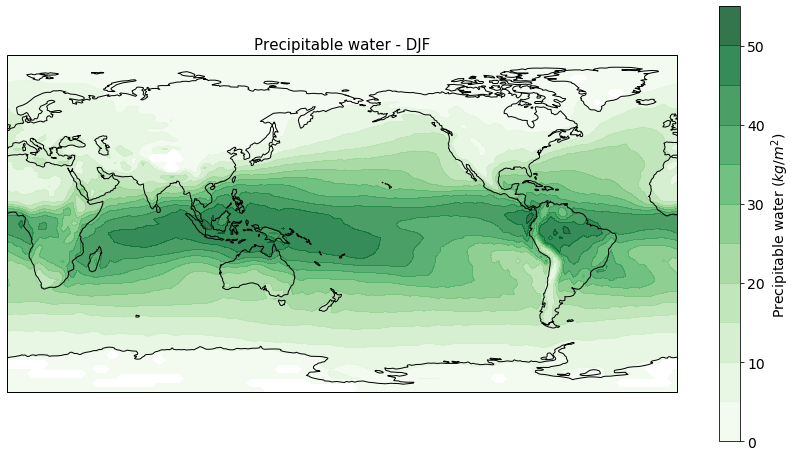

In [100]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
ax.coastlines()

pw = ds_PrecipWater_LTM.mean(dim = 'time')['pr_wtr']
pw = pw.where(pw > 0)

c = ax.contourf(pw.lon, pw.lat,
            pw,10,transform=ccrs.PlateCarree(), cmap='Greens', alpha=0.8)

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label(label='Precipitable water ($kg/m^{2}$)',fontsize=14)
#ax.stock_img()

plt.title('Precipitable water - DJF', fontsize=15)
plt.show()